# 逆谐波均值滤波

In [1]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats
import scipy.ndimage.filters as nd_filters
import time
from numpy.linalg import cholesky

In [2]:
gray = cv2.imread('../../datas/f4.jpg',0)
rgb = cv2.cvtColor(cv2.imread('../../datas/f4.jpg'),cv2.COLOR_BGR2RGB)
rows,cols,ch = rgb.shape

In [3]:
def noise_pepper(img,a):
    m,n = img.shape[0],img.shape[1]
    R = np.random.randn(m,n)
    dst = np.zeros(img.shape,dtype=np.float64)
    rgb = np.float64(img)
#     df_R = DataFrame(R)
    idx = R <= a
    dst[idx] = rgb[idx]
    return dst

In [4]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [5]:
src_noise_pepper = noise_pepper(gray,0.01)
noise = noise_gaussian(rows,cols,a=0,b=0.1)
src_noise_gray = gray.astype(np.float32) + noise * 255
src_noise_gray[src_noise_gray < 0] = 0
src_noise_gray[src_noise_gray > 255] = 255
src_noise_gray = src_noise_gray.astype(np.uint8)

In [6]:
def conharmmean_filter(x,m,n,q):
    eps = 1.0e-5
    kernel = np.ones((m,n)) / (m*n)
    x_f = x.astype(np.float32)
    im = cv2.filter2D(x_f ** (q + 1),-1,kernel)
    im = im / ((cv2.filter2D(x_f ** (q),-1,kernel)) + eps)
    im = im.astype('uint8')
    return im

In [8]:
dst = conharmmean_filter(src_noise_gray,3,3,0.5)

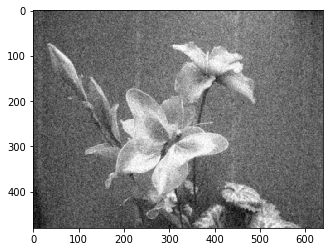

In [9]:
plt.imshow(dst,'gray')